In [1]:
%matplotlib inline

%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
%autoreload 2
from src.pySRM.pysrm.imzml import IMZMLExtract
%autoreload 2
from src.pySRM.pysrm.comparative import CombinedSpectra

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


In [3]:
! ls /mnt/s/data/globus_win/

d9e3c80a32567cde9b61e38ce8693559  f1fc56fe8e39a9c05328d905d1c4498e


In [5]:
! ls /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML

VAN0010-LK-155-40-IMS_PosMode.ibd
VAN0010-LK-155-40-IMS_PosMode.imzML
VAN0010-LK-155-40-IMS_PosMode.imzML.regions


In [6]:
! rm /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML.regions

Detecting Regions


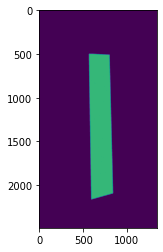

Detecting Regions Finished


In [7]:
imze_male = IMZMLExtract("/mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML")

1 ((1, 1, 1342, 1342), 1)
2 ((501, 2163, 569, 842), 393413)
3 ((2489, 2489, 1, 1), 1)


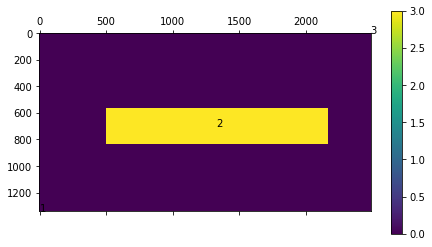

{1: ((1, 1, 1342, 1342), 1),
 2: ((501, 2163, 569, 842), 393413),
 3: ((2489, 2489, 1, 1), 1)}

In [8]:
imze_male.list_regions()

In [9]:
male_spectra2_orig = imze_male.get_region_array(2, makeNullLine=True)

Fetching region range
Fetching region shape
Found region 2 with shape (1663, 274, 61)
Fetching region spectra
100% (393413 of 393413) |################| Elapsed Time: 0:01:53 Time:  0:01:53
100% (393413 of 393413) |################| Elapsed Time: 0:00:04 Time:  0:00:04


In [11]:
male_spectra2_intra = imze_male.normalize_region_array(male_spectra2_orig, normalize="intra_median")
male_spectra2 = imze_male.normalize_region_array(male_spectra2_intra, normalize="inter_median")

Started Log Value: 100.0
100% (1663 of 1663) |####################| Elapsed Time: 0:00:13 Time:  0:00:13
Got 393077 median-enabled pixels
5-Number stats for medians: (455662, 393077, 0.0, 0.6269781461944235, 0.8544891640866873, 1.079016691698337, 2.958079409048938)
Started Log Value: 118.63738632202148
100% (1663 of 1663) |####################| Elapsed Time: 0:00:19 Time:  0:00:19
Got a total of 27795382 fold changes
Median elements [13897691]
Median elements
Global Median 0.79762


Started Log Value: 100.0


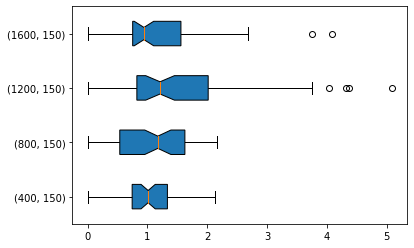

In [12]:
imze_male.plot_fcs(male_spectra2_orig, [(400,150), (800,150), (1200,150), (1600, 150)])

Started Log Value: 148.73923211807815


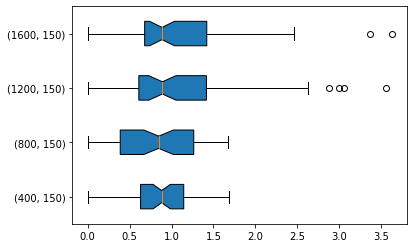

In [13]:
imze_male.plot_fcs(male_spectra2, [(400,150), (800,150), (1200,150), (1600, 150)])

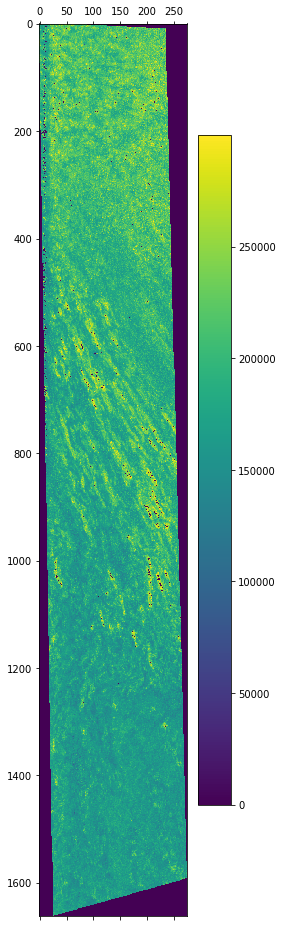

In [41]:
imze_male.plot_toc(male_spectra2)

In [46]:
male_spec = SpectraRegion(np.log(male_spectra2+1), imze_male.mzValues)

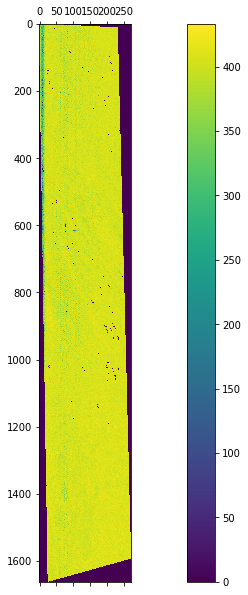

In [48]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

In [49]:
#male_spec.set_null_spectra(lambda x: np.sum(x) > 300000)

2020-09-28 17:54:04,183  SpectraRegion  INFO: Processing Mass 703 with best existing mass 703.57470703125


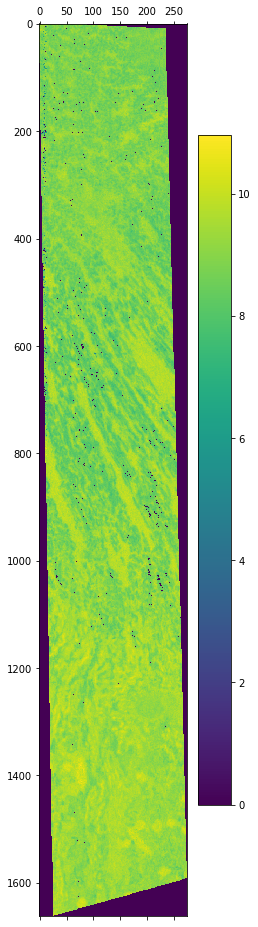

In [50]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.mass_heatmap(703)
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [53]:
male_spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=10000)

2020-09-28 18:30:01,263  SpectraRegion  INFO: Calculating clusters
2020-09-28 18:30:01,264  SpectraRegion  INFO: Elem Matrix of shape: (455662, 61)
2020-09-28 18:30:01,687  SpectraRegion  INFO: UMAP reduction
2020-09-28 18:39:04,787  SpectraRegion  INFO: HDBSCAN reduction
2020-09-28 18:39:04,788  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (10000, 2)
2020-09-28 18:39:05,130  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (455662, 2)
2020-09-28 18:43:26,257  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (455662, 117)
2020-09-28 18:43:26,258  SpectraRegion  INFO: HDBSCAN Soft Clusters: (455662, 117)
2020-09-28 18:43:26,259  SpectraRegion  INFO: HDBSCAN Labeling


[[2.26332239e-03 1.90555804e-03 2.73505098e-03 ... 2.50059499e-03
  3.20138768e-03 3.36862434e-03]
 [1.01757654e-03 1.02591451e-03 7.24700396e-04 ... 2.01247433e-03
  1.35205781e-03 1.72663603e-03]
 [3.04192544e-07 3.32766373e-07 2.65894859e-07 ... 8.59634535e-07
  1.00227022e-06 9.99951062e-01]
 ...
 [9.99999999e-01 4.73294141e-18 4.43883362e-18 ... 6.05464928e-18
  7.43172984e-18 7.05748171e-18]
 [2.03098491e-01 2.36930182e-03 2.18290879e-03 ... 3.05725588e-03
  3.71020015e-03 3.53762599e-03]
 [9.99999999e-01 4.32877070e-16 4.00678987e-16 ... 5.61459868e-16
  6.94692203e-16 6.58987041e-16]]


2020-09-28 18:43:26,887  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-09-28 18:43:26,889  SpectraRegion  INFO: Cluster Reduction
2020-09-28 18:43:26,889  SpectraRegion  INFO: Calculating consensus spectra
2020-09-28 18:43:27,595  SpectraRegion  INFO: Setting consensus spectra
2020-09-28 18:43:27,596  SpectraRegion  INFO: Calculating consensus spectra done
2020-09-28 18:43:27,939  SpectraRegion  INFO: Calculating clusters done
2020-09-28 18:43:28,170  SpectraRegion  INFO: Calculating clusters saved


array([[ 1,  8,  6, ..., 15, 15, 15],
       [ 1,  6,  3, ..., 15, 15, 15],
       [ 6,  6,  6, ..., 15, 15, 15],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]], dtype=int16)

In [54]:
male_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=1000)

2020-09-28 18:43:28,206  SpectraRegion  INFO: HDBSCAN reduction
2020-09-28 18:43:28,207  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (1000, 2)
2020-09-28 18:43:28,234  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (455662, 2)
2020-09-28 18:44:22,637  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (455662, 33)
2020-09-28 18:44:22,637  SpectraRegion  INFO: HDBSCAN Soft Clusters: (455662, 33)
2020-09-28 18:44:22,638  SpectraRegion  INFO: HDBSCAN Labeling


[[7.12436822e-11 6.99688464e-11 8.93765697e-11 ... 1.00503488e-10
  1.12532674e-10 1.34487353e-10]
 [5.51528834e-03 5.95679070e-03 9.36711580e-03 ... 9.81475557e-03
  9.42107311e-03 9.79476021e-03]
 [5.78355429e-08 6.86334910e-08 9.56785117e-08 ... 1.42649793e-07
  2.41722173e-07 9.99997215e-01]
 ...
 [9.99979741e-01 2.19271227e-08 3.88950004e-08 ... 2.58973028e-08
  2.75786761e-08 3.19711493e-08]
 [1.69679264e-01 6.77380061e-03 1.23699369e-02 ... 8.03974857e-03
  8.53945683e-03 9.92184544e-03]
 [9.99999995e-01 1.04629418e-10 1.94655749e-10 ... 1.24624853e-10
  1.33052075e-10 1.55802888e-10]]


2020-09-28 18:44:23,244  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-09-28 18:44:23,245  SpectraRegion  INFO: Cluster Reduction
2020-09-28 18:44:23,245  SpectraRegion  INFO: Calculating consensus spectra
2020-09-28 18:44:23,947  SpectraRegion  INFO: Setting consensus spectra
2020-09-28 18:44:23,948  SpectraRegion  INFO: Calculating consensus spectra done


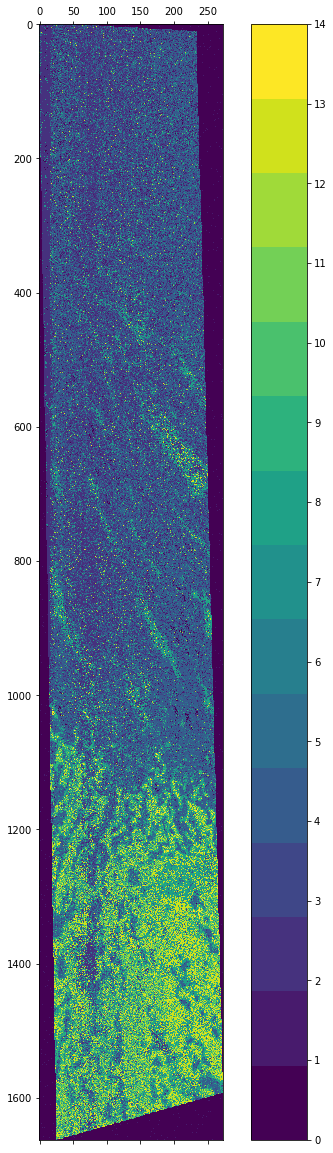

In [67]:
mpl.rcParams['figure.figsize'] = (10,20)
male_spec.plot_segments()

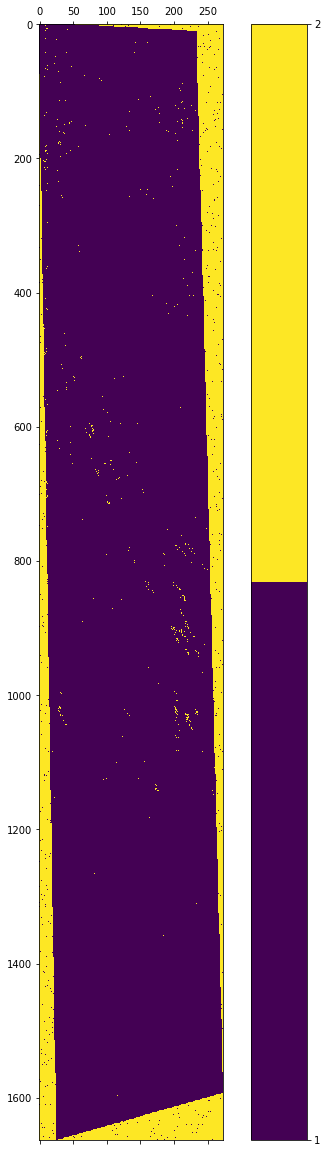

In [62]:
male_spec.plot_segments(highlight=[15])

In [63]:
male_spec.set_background(15)

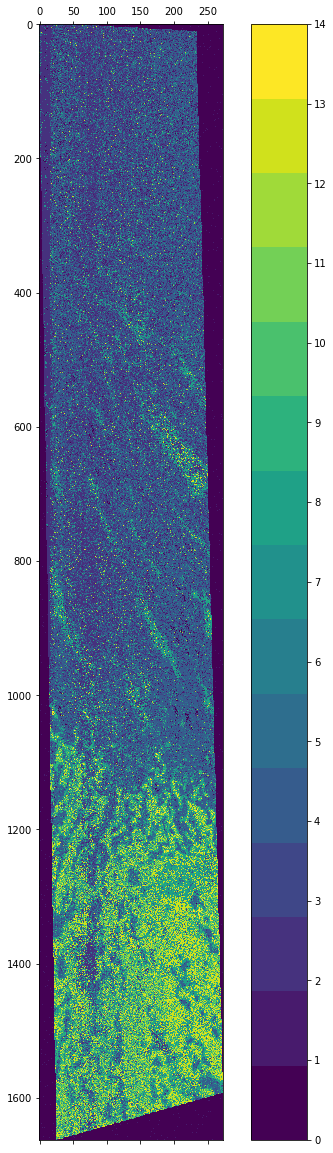

In [64]:
male_spec.plot_segments()

In [65]:
male_spec.list_segment_counts()

0 :  62284
1 :  14779
2 :  83881
3 :  24879
4 :  110269
5 :  24978
6 :  6666
7 :  24619
8 :  38155
9 :  16321
10 :  12635
11 :  5110
12 :  10121
13 :  17317
14 :  3648


2020-09-28 19:34:43,290  SpectraRegion  INFO: Pixels    : 455662
2020-09-28 19:34:43,291  SpectraRegion  INFO: Unassigned: 0
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


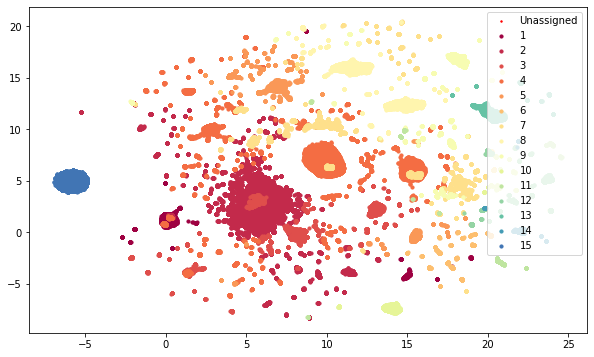

In [66]:
mpl.rcParams['figure.figsize'] = (10,6)
male_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
! ls /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML

In [ ]:
! rm /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML.regions

In [ ]:
imze_female = IMZMLExtract("/mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML")

In [ ]:
imze_female.list_regions()

In [ ]:
female_spectra2_orig = imze_female.get_region_array(2, makeNullLine=True)

In [ ]:
female_spectra2_intra = imze.normalize_region_array(female_spectra2_orig, normalize="intra_median")
female_spectra2 = imze.normalize_region_array(female_spectra2_intra, normalize="inter_median")

In [ ]:
female_spectra2_orig.shape

In [ ]:
imze.plot_fcs(female_spectra2_orig, [(150,100), (150,500), (150,900), (150, 1300)])

In [ ]:
imze.plot_fcs(female_spectra2, [(150,100), (150,500), (150,900), (150, 1300)])

In [ ]:
female_spec = SpectraRegion(female_spectra2, imze.mzValues)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
female_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [ ]:
female_spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=10000)

In [ ]:
female_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=20000)

In [ ]:
female_spec.plot_segments()

In [ ]:
female_spec.set_background(1)

In [ ]:
female_spec.plot_segments(highlight=2)

In [ ]:
female_spec.list_segment_counts()

In [ ]:
mpl.rcParams['figure.figsize'] = (10,6)
female_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
combSpec = CombinedSpectra({"male": male_spec, "female": female_spec})

In [ ]:
combSpec.consensus_similarity()

In [ ]:
combSpec.consensus_similarity_matrix

In [ ]:
combSpec.plot_consensus_similarity()

In [ ]:
combSpec.cluster_concensus_spectra(number_of_clusters=5)

In [ ]:
combSpec.plot_common_segments()

In [ ]:
male_spec.plot_tic()

In [ ]:
    _ = combSpec.mass_heatmap(720)

In [ ]:
resdf, expr, pdata = combSpec.find_markers("male", [x for x in np.unique(male_spec.segmented) if x > 0], "female", [x for x in np.unique(female_spec.segmented) if x > 0], None, sample_max=10000, scaled=False)

In [ ]:
expkey=('male', (2, 3, 4), 'female', (2, 3, 4))
deresdf = resdf["rank"][expkey]

In [ ]:
deresdf

In [ ]:
combSpec.mass_intensity(818.5443, scaled=False)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
_ = combSpec.mass_heatmap(818.5443, scaled=False)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
from adjustText import adjust_text

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-deresdf["avg_logFC"]), list(-np.log10(deresdf["qvalue"])))]
dotgene = list(deresdf["gene_mass"])
texts = []
seenProts = set()
allYValues = set()
for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if y > 100:
        y = 100
        
    allYValues.add(y)
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

plt.ylim((0, 10+max(allYValues)))
        
if len(texts) > 0:
    adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()